In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = int(input("Please Enter the number of queens you want: "))
p = int(input("Please Enter the number of population: "))
mutation_rate = int(input("Please Enter the mutation rate (0-100) : "))
epochs = int(input("Please Enter The number of epochs: "))

current_generation = []
next_generation = []

Please Enter the number of queens you want: 8
Please Enter the number of population: 500
Please Enter the mutation rate (0-100) : 90
Please Enter The number of epochs: 100


In [3]:
def rnd_generation(p,n):
    p_list = []
    for i in range(p):
        current = []
        for i in range(n):
            current.append(random.randint(1,n))
        current.append(0)
        p_list.append(current)
    return p_list

In [4]:
def fitness(current_generation,n,p):
    conflict = 0
    for i in range(p):
        conflict = 0
        for j in range(n):
            for z in range(j+1,n):
                if current_generation[i][j] == current_generation[i][z]:
                    conflict+=1
                if abs(j-z)==abs(current_generation[i][j]-current_generation[i][z]):
                    conflict+=1
        current_generation[i][8]=conflict

    for i in range(p):
        for j in range(i+1,p):
            if current_generation[i][8]> current_generation[j][8]:
                temp = current_generation[i]
                current_generation[i]=current_generation[j]
                current_generation[j]=temp
    return current_generation

In [5]:
def cross_over(p_list):
    for i in range(0,(p//2)-2,2):
        p_list[i+(p//2)]=(p_list[i][:n//2])+(p_list[i+1][n//2:n])+[0]
        p_list[i+(p//2)+1]=(p_list[i+1][:n//2])+(p_list[i][n//2:n])+[0]
    return p_list

In [6]:
def mutation(p_list):
    if mutation == 0:
        return p_list
    else:
        chosen = []
        n_rate = ((p//2)*mutation_rate)//100
        i=0
        while i< n_rate:
            new_rand = random.randint((p//2),p-1)
            if new_rand not in chosen:
                chosen.append(new_rand)
                i+=1
        for i in chosen:
            new_rand = random.randint(0,n-1)
            p_list[i][new_rand] = random.randint(1,n)
    return p_list

In [7]:
def showRes(res):
    l = len(res)
    plt.figure(figsize=(6, 6))
    plt.scatter([x+1 for x in range(l - 1)], res[:l - 1])
    for i in range(l):
        plt.plot([0.5, l - 0.5], [i + 0.5, i + 0.5], color = "k")
        plt.plot([i + 0.5, i + 0.5], [0.5, l - 0.5], color = "k")

In [8]:
current_generation = rnd_generation(p,n)
current_generation = fitness(current_generation,n,p)
current_generation = cross_over(current_generation)
current_generation = mutation(current_generation)
current_generation = fitness(current_generation,n,p)
print("#0:")
if current_generation[0][n] == 0:
    print("Solution Found", current_generation[0])
else:
    print("Best Solution till this epoch is: ", current_generation[0])

#0:
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]


# 1 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 2 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 3 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 4 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 5 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 6 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 7 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 8 :
Best Solution till this epoch is:  [4, 2, 5, 8, 1, 7, 8, 6, 2]
# 9 :
Best Solution till this epoch is:  [8, 3, 1, 6, 8, 5, 7, 4, 1]
# 10 :
Best Solution till this epoch is:  [8, 3, 1, 6, 8, 5, 7, 4, 1]
# 11 :
Best Solution till this epoch is:  [8, 3, 1, 6, 8, 5, 7, 4, 1]
# 12 :
Best Solution till this epoch is:  [8, 3, 1, 6, 8, 5, 7, 4, 1]
# 13 :
Best Solution till this epoch is:  [8, 3, 1, 6, 8, 5, 7, 4, 1]
# 14 :
Best Solution till this epoch is:  [8, 3, 1, 6, 8, 5, 7, 4, 1]
# 15 :
Best Solution till thi

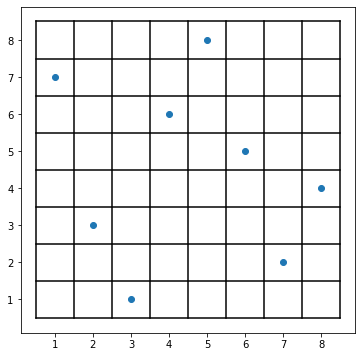

In [9]:
for i in range(1,epochs+1):
    print("#",i,":")
    current_generation = cross_over(current_generation)
    current_generation = mutation(current_generation)
    current_generation = fitness(current_generation,n,p)
    if current_generation[0][n] == 0:
        print("Solution Found", current_generation[0])
        showRes(current_generation[0])
        break
    else:
        print("Best Solution till this epoch is: ", current_generation[0])